### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



La suma total de los productos de Tienda 1 es de: 1,150,880,400.00
La suma total de los productos de Tienda 2 es de: 1,116,343,500.00
La suma total de los productos de Tienda 3 es de: 1,098,019,600.00
La suma total de los productos de Tienda 4 es de: 1,038,375,700.00


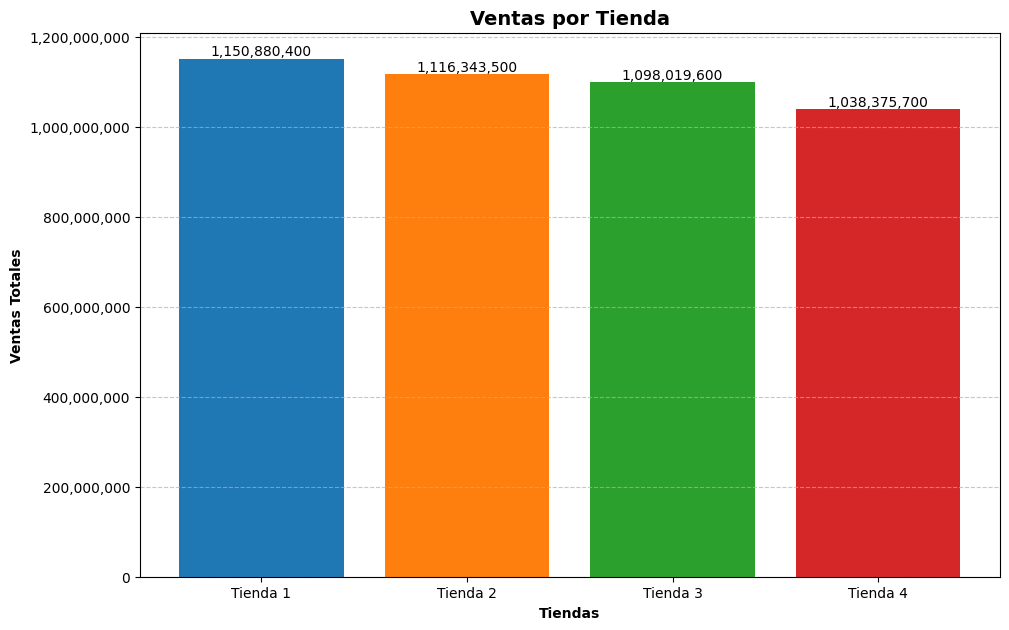

In [ ]:
import matplotlib.pyplot as plt

def suma(df, nombre_tienda):
    resultado = sum(df["Precio"])
    print(f'La suma total de los productos de {nombre_tienda} es de: {resultado:,.2f}')
    return resultado


ventas = [
    suma(tienda, 'Tienda 1'),
    suma(tienda2, 'Tienda 2'),
    suma(tienda3, 'Tienda 3'),
    suma(tienda4, 'Tienda 4')
]

nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']


plt.figure(figsize=(10, 6))
bars = plt.bar(nombres, ventas, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])


plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom')

plt.xlabel('Tiendas', fontweight='bold')
plt.ylabel('Ventas Totales', fontweight='bold')
plt.title('Ventas por Tienda', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 2. Ventas por categoría

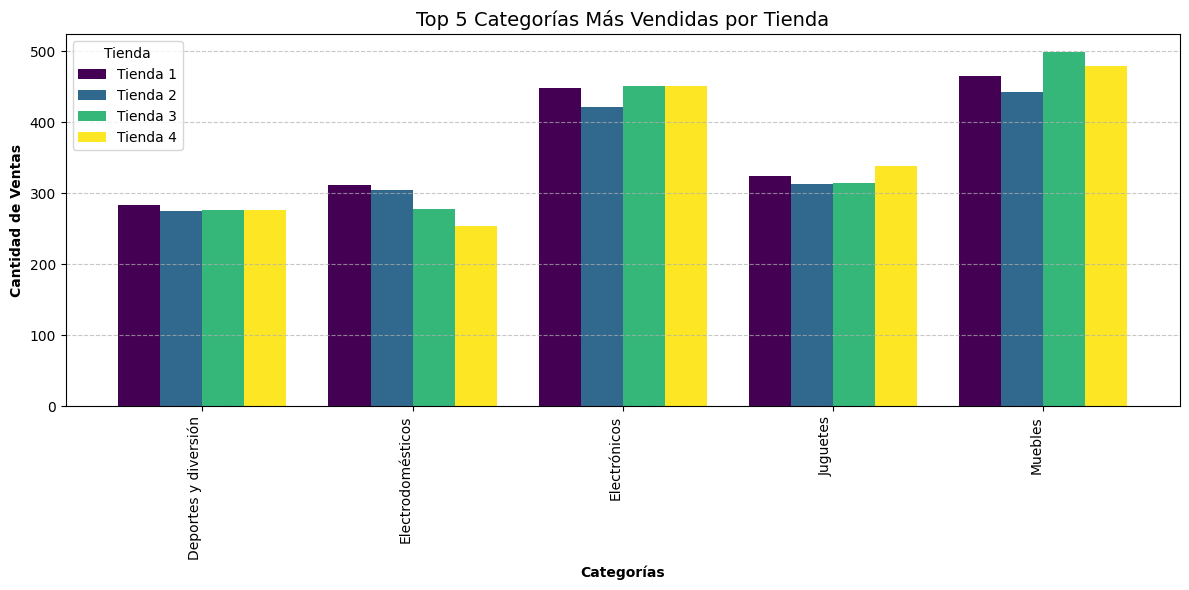

In [ ]:
import matplotlib.pyplot as plt


def obtener_top_categorias(df, nombre_tienda):
    categorias = df["Categoría del Producto"].value_counts().nlargest(5)
    return categorias

top_tienda1 = obtener_top_categorias(tienda, '1')
top_tienda2 = obtener_top_categorias(tienda2, '2')
top_tienda3 = obtener_top_categorias(tienda3, '3')
top_tienda4 = obtener_top_categorias(tienda4, '4')


df_comparativo = pd.DataFrame({
    'Tienda 1': top_tienda1,
    'Tienda 2': top_tienda2,
    'Tienda 3': top_tienda3,
    'Tienda 4': top_tienda4
}).fillna(0)


ax = df_comparativo.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='viridis')
plt.title('Top 5 Categorías Más Vendidas por Tienda', fontsize=14)
plt.xlabel('Categorías', fontweight='bold')
plt.ylabel('Cantidad de Ventas', fontweight='bold')
plt.xticks( ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

In [ ]:
def ventas_por_categoria(df, nombre_tienda):
  print(f'\nVentas por categoría de la tienda {nombre_tienda}')
  print(df["Categoría del Producto"].value_counts())

ventas_por_categoria(tienda, '1')
ventas_por_categoria(tienda2, '2')
ventas_por_categoria(tienda3, '3')
ventas_por_categoria(tienda4, '4')



Ventas por categoría de la tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría de la tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría de la tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int6

# 3. Calificación promedio de la tienda


In [ ]:
def calificaciones_promedio(df, nombre_tienda):
  df["Calificación"] = df["Calificación"].astype(float)
  promedio = sum(df["Calificación"]) / len(df["Calificación"])
  print(f'El promedio de la tienda {nombre_tienda} es de: {round(promedio,2)}')

calificaciones_promedio(tienda, '1')
calificaciones_promedio(tienda2, '2')
calificaciones_promedio(tienda3, '3')
calificaciones_promedio(tienda4, '4')

El promedio de la tienda 1 es de: 3.98
El promedio de la tienda 2 es de: 4.04
El promedio de la tienda 3 es de: 4.05
El promedio de la tienda 4 es de: 4.0


# 4. Productos más y menos vendidos

El producto más vendido de la tienda 1 es 'Microondas' con una cantidad de 60 unidades y el menos vendido es Auriculares con micrófono con una cantidad de 33 unidades .


In [ ]:
def contar_productos(df,nombre_tienda):
    conteo = df['Producto'].value_counts()
    producto_mas_vendido = conteo.idxmax()
    cantidad_mas_vendida = conteo.max()

    producto_menos_vendido = conteo.idxmin()
    cantidad_menos_vendida = conteo.min()

    print(f'El producto mas vendido de {nombre_tienda} es:\n {producto_mas_vendido} con una cantidad de {cantidad_mas_vendida} \n \n El producto menos vendido de {nombre_tienda} es: \n {producto_menos_vendido} con una cantidad de {cantidad_menos_vendida} \n')

contar_productos(tienda, 'Tienda 1')
contar_productos(tienda2, 'Tienda 2')
contar_productos(tienda3, 'Tienda 3')
contar_productos(tienda4, 'Tienda 4')


El producto mas vendido de Tienda 1 es:
 Microondas con una cantidad de 60 
 
 El producto menos vendido de Tienda 1 es: 
 Auriculares con micrófono con una cantidad de 33 

El producto mas vendido de Tienda 2 es:
 Iniciando en programación con una cantidad de 65 
 
 El producto menos vendido de Tienda 2 es: 
 Juego de mesa con una cantidad de 32 

El producto mas vendido de Tienda 3 es:
 Kit de bancas con una cantidad de 57 
 
 El producto menos vendido de Tienda 3 es: 
 Bloques de construcción con una cantidad de 35 

El producto mas vendido de Tienda 4 es:
 Cama box con una cantidad de 62 
 
 El producto menos vendido de Tienda 4 es: 
 Guitarra eléctrica con una cantidad de 33 



# 5. Envío promedio por tienda

El costo de envío promedio de Tienda 1 es de: 26018.61
El costo de envío promedio de Tienda 2 es de: 25216.24
El costo de envío promedio de Tienda 3 es de: 24805.68
El costo de envío promedio de Tienda 4 es de: 23459.46


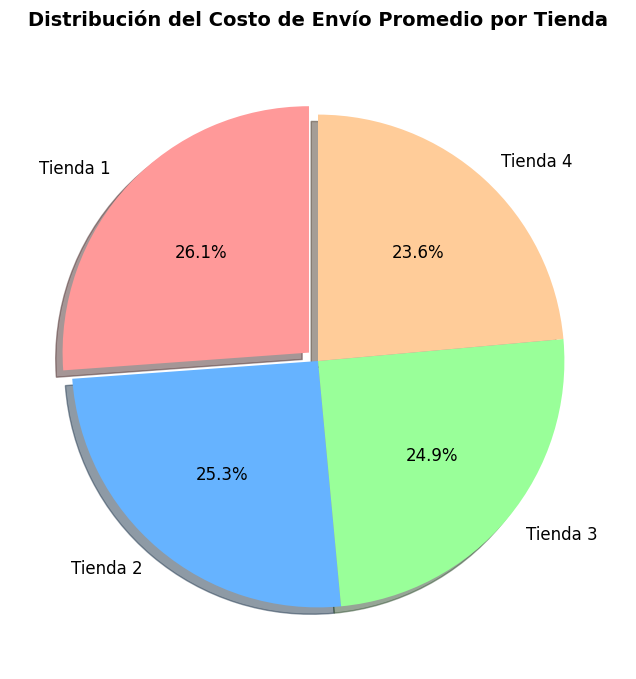

In [ ]:
import matplotlib.pyplot as plt

def costo_envio(df, nombre_tienda):
    costo = round(df['Costo de envío'].mean(), 2)
    print(f'El costo de envío promedio de {nombre_tienda} es de: {costo}')
    return costo


costos = [
    costo_envio(tienda, 'Tienda 1'),
    costo_envio(tienda2, 'Tienda 2'),
    costo_envio(tienda3, 'Tienda 3'),
    costo_envio(tienda4, 'Tienda 4')
]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
explode = (0.05, 0, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(costos, labels=tiendas, autopct='%1.1f%%',
        colors=colores, explode=explode, startangle=90,
        shadow=True, textprops={'fontsize': 12})
plt.title('Distribución del Costo de Envío Promedio por Tienda',
          fontsize=14, fontweight='bold', pad=20)
plt.show()

conclusión:

Con base en el análisis integral de desempeño, se recomienda el cierre de la Tienda 4. Esta decisión se sustenta en que presenta el menor volumen de ventas totales, con una diferencia significativa de más de $112 millones respecto a la Tienda 1. Además, registra la calificación promedio más baja entre las cuatro tiendas, lo cual refleja una menor satisfacción por parte de los clientes. Aunque sus costos de envío son ligeramente menores, este aspecto no compensa sus deficiencias en ventas y percepción de calidad. Por lo tanto, se considera la opción menos viable para mantener operaciones.